Link em que está presente o banco de dados: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

In [14]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, average_precision_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMClassifier

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [16]:
df = pd.read_csv('/content/drive/MyDrive/Teste_de_Python/Fraude_de_Cartao/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [17]:
# Verificação da distribuição das classes
print("Distribuição das Classes:")
print(df['Class'].value_counts(normalize=True))

Distribuição das Classes:
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


In [18]:
# Separação entre features e target
X = df.drop(columns=['Class'])
y = df['Class']

In [19]:
# Normalização das variáveis 'Time' e 'Amount'
scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

In [20]:
# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [21]:
# Aplicação de SMOTE (oversampling)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [22]:
# Aplicação de Undersampling
undersample = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

In [23]:
# Função para treinar modelos e avaliar AUPRC
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Treinamento do modelo
    model.fit(X_train, y_train)

    # Previsões
    y_pred = model.predict(X_test)
    y_scores = model.predict_proba(X_test)[:, 1]

    # Cálculo da AUPRC
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    avg_precision = average_precision_score(y_test, y_scores)
    print(f"\nModelo: {model_name}")
    print(f"AUPRC: {avg_precision:.4f}")
    print(classification_report(y_test, y_pred))

    # Curva Precision-Recall
    plt.figure()
    plt.plot(recall, precision, marker='.', label=f"{model_name} (AUPRC = {avg_precision:.4f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.show()

In [24]:
# Modelos disponíveis para treinamento
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(class_weight='balanced', random_state=42),
}


Modelos Disponíveis:
1. Logistic Regression
2. Random Forest
3. XGBoost
4. LightGBM

Escolha o modelo pelo número: 1

Treinando e avaliando o modelo: Logistic Regression

Modelo: Logistic Regression
AUPRC: 0.7062
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443



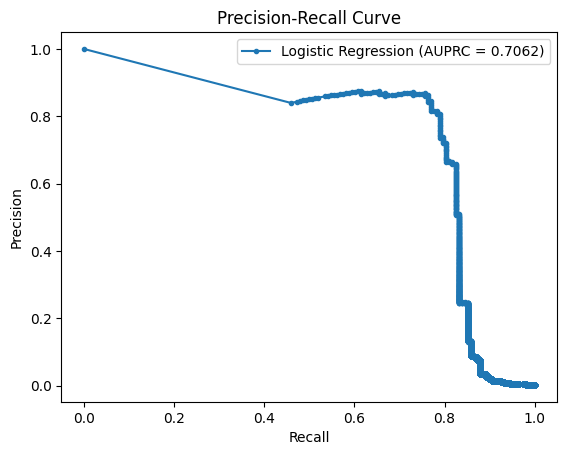

In [26]:
# Escolha do modelo pelo número
print("\nModelos Disponíveis:")
for i, model_name in enumerate(models.keys(), 1):
    print(f"{i}. {model_name}")

# Solicitar que o usuário escolha um modelo
choice = int(input("\nEscolha o modelo pelo número: "))
model_name = list(models.keys())[choice - 1]
model = models[model_name]

# Treinamento e avaliação do modelo escolhido com SMOTE
print(f"\nTreinando e avaliando o modelo: {model_name}")
train_and_evaluate_model(model, X_train_smote, y_train_smote, X_test, y_test, model_name)


Modelos Disponíveis:
1. Logistic Regression
2. Random Forest
3. XGBoost
4. LightGBM

Escolha o modelo pelo número: 2

Treinando e avaliando o modelo: Random Forest

Modelo: Random Forest
AUPRC: 0.6915
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.88      0.13       148

    accuracy                           0.98     85443
   macro avg       0.54      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443



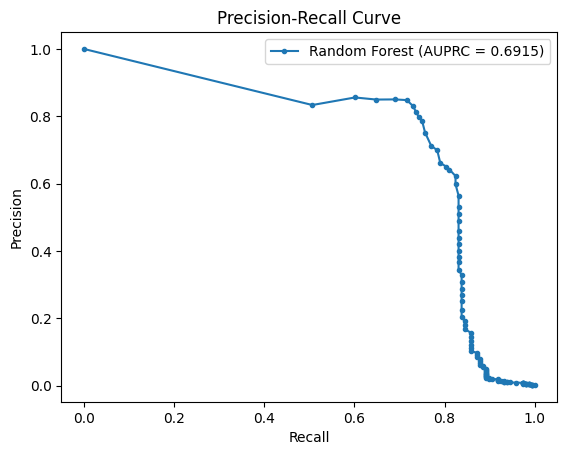

In [30]:
# Escolha do modelo pelo número
print("\nModelos Disponíveis:")
for i, model_name in enumerate(models.keys(), 1):
    print(f"{i}. {model_name}")

# Solicitar que o usuário escolha um modelo
choice = int(input("\nEscolha o modelo pelo número: "))
model_name = list(models.keys())[choice - 1]
model = models[model_name]

# Treinamento e avaliação do modelo escolhido com Undersampling
print(f"\nTreinando e avaliando o modelo: {model_name}")
train_and_evaluate_model(model, X_train_under, y_train_under, X_test, y_test, model_name)



**Explicação das Abordagens**

**SMOTE**

O oversampling cria exemplos sintéticos da classe minoritária (fraudes), ajudando o modelo a aprender melhor.

**Undersampling**

Reduz a quantidade de exemplos da classe majoritária (transações legítimas), balanceando o dataset, mas reduzindo o volume de dados.

**Classificadores**

Cada modelo tem características distintas:

**Logistic Regression**: Simples e eficaz para problemas lineares.

**Random Forest**: Resistente a overfitting e bom em capturar relações não lineares.

**XGBoost**: Potente em detecção de padrões complexos.

**SVM**: Eficiente em datasets de alta dimensionalidade.

**Métricas**

Usar a AUPRC é essencial em problemas desbalanceados, pois métricas como acurácia podem ser enganosas.

** Cartão Sem balanceamento **

In [ ]:
# Dicionário de modelos disponíveis (corrigido)
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(scale_pos_weight=(len(y_train) / sum(y_train)), use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(class_weight='balanced', random_state=42),
}

# Escolha do modelo
print("\nModelos Disponíveis:")
for i, model_name in enumerate(models.keys(), 1):
    print(f"{i}. {model_name}")

# Solicitação da escolha do usuário
choice = int(input("\nEscolha o modelo pelo número: ")) - 1
model_name = list(models.keys())[choice]
model = models[model_name]

# Treinamento e avaliação
train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name)
